In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme()
sns.set_palette('Paired')

In [3]:
os.listdir('data')

['Dewas_NDVI.csv',
 'Dewas_points.csv',
 'Kaithal_NDVI.csv',
 'Kaithal_points.csv',
 'Karnal_NDVI.csv',
 'Karnal_points.csv']

In [4]:
districts = ['Dewas', 'Kaithal', 'Karnal']

In [5]:
data = dict(zip(districts, [{}, {}, {}]))
for district in districts:
    points = pd.read_csv(f'data/{district}_points.csv')
    ndvi = pd.read_csv(f'data/{district}_NDVI.csv')
    data[district]['points'] = points
    data[district]['NDVI'] = ndvi
    data[district]['merged'] = points.merge(ndvi,
                                            left_on='gfid',
                                            right_on='gfid')

In [6]:
data['Dewas']['points'].head()

,gfid,state,district,village,lon,lat,wheat
0,72001,Madhya Pradesh,Dewas,VijayaganjMandi,75.961990,23.218479,0
1,72002,Madhya Pradesh,Dewas,VijayaganjMandi,75.967369,23.216789,0
2,72003,Madhya Pradesh,Dewas,VijayaganjMandi,75.969818,23.215910,1
3,72004,Madhya Pradesh,Dewas,VijayaganjMandi,75.965042,23.220369,0
4,72005,Madhya Pradesh,Dewas,VijayaganjMandi,75.965652,23.224600,0


In [7]:
data['Kaithal']['NDVI'].head()

,gfid,datenum,date,ndvi
0,52001,0,2020-10-20,0.238
1,52001,1,2020-10-21,0.235
2,52001,2,2020-10-22,0.233
3,52001,3,2020-10-23,0.231
4,52001,4,2020-10-24,0.228


In [8]:
for district in districts:
    print(district, ' ', data[district]['NDVI']['date'].shape)

Dewas   (85231,)
Kaithal   (38417,)
Karnal   (53505,)


In [9]:
for district in districts:
    print(district, ' ', data[district]['NDVI']['date'].min(),
          data[district]['NDVI']['date'].max())

Dewas   2020-10-20 2021-05-10
Kaithal   2020-10-20 2021-05-10
Karnal   2020-10-20 2021-05-10


In [10]:
for district in districts:
    print(district, ' ', data[district]['points']['village'].nunique())

Dewas   100
Kaithal   83
Karnal   75


In [11]:
for district in districts:
    print('\033[1m' + district + '\033[0m')
    print(data[district]['points']['village'].value_counts(), end='\n\n')

Dewas
Banasri        15
Donta          14
Khareli        14
Amuna          12
BagliChapda    12
               ..
Amina           1
Murviya         1
Pipalrava       1
Shkli           1
Rajoda          1
Name: village, Length: 100, dtype: int64

Kaithal
Gyong            8
Pharal           6
Sakra Khedi      6
Narar            5
Dherdu           5
                ..
Kakhedhi         1
Gobindpura       1
Gobndpura        1
Dharatarasing    1
Jadula           1
Name: village, Length: 83, dtype: int64

Karnal
Shekhanpur        9
Kabulpur Khera    8
Bambradi          8
Poyat             8
Panori            7
                 ..
Tarori            1
Landors           1
Kurak             1
Ramba             1
Barshi            1
Name: village, Length: 75, dtype: int64



In [12]:
for district in districts:
    print(district, ' ', data[district]['points']['state'].unique())

Dewas   ['Madhya Pradesh ']
Kaithal   ['Haryana ']
Karnal   ['Haryana ']


In [13]:
for district in districts:
    print(district, ' ', data[district]['points']['district'].unique())

Dewas   ['Dewas ']
Kaithal   ['Kaithal ']
Karnal   ['Karnal ']


In [14]:
for district in districts:
    print('\033[1m' + district + '\033[0m')
    print(data[district]['points']['wheat'].value_counts(normalize=True) * 100,
          end='\n\n')

Dewas
0    51.415094
1    48.584906
Name: wheat, dtype: float64

Kaithal
1    54.166667
0    45.833333
Name: wheat, dtype: float64

Karnal
1    59.701493
0    40.298507
Name: wheat, dtype: float64



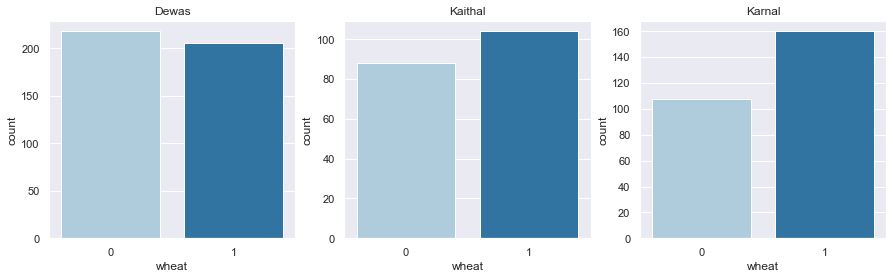

In [15]:
fig, axs = plt.subplots(figsize=(15, 4), ncols=3)
for i, district in enumerate(districts):
    plot = sns.countplot(x='wheat', data=data[district]['points'], ax=axs[i])
    plot.set_title(district)

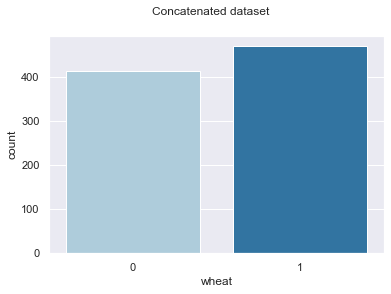

In [16]:
sns.countplot(x='wheat',
              data=pd.concat(
                  [data[district]['points'] for district in districts]))
plt.suptitle('Concatenated dataset')
plt.show()

In [17]:
print('Unweighted average of label 1 is:', "{:.2%}".format(
    (0.49 + 0.54 + 0.6) / 3))

Unweighted average of label 1 is: 54.33%


In [18]:
print(
    'Weighted average of label 1 is:',
    "{:.2%}".format(0.49 * (206 / 470) + 0.54 * (104 / 470) + 0.6 *
                    (160 / 470)))

Weighted average of label 1 is: 53.85%


In [19]:
print('Missing values:')
for district in districts:
    i = 1
    for id_ in data[district]['points']['gfid'].values:
        shp = data[district]['NDVI'][data[district]['NDVI']['gfid'] ==
                                     id_].shape[0]
        if shp != 203:
            i += 1
            print(id_, shp)
    print(district, i, i / len(data[district]))

Missing values:
72012 187
72013 187
72014 187
72034 202
72035 186
72037 186
72059 187
72077 187
72078 187
72107 197
72111 152
72119 187
72128 187
72130 187
72132 197
72133 187
72139 187
72140 187
72142 187
72148 187
72150 187
72153 187
72154 187
72155 187
72156 177
72157 202
72187 187
72188 187
72191 187
72222 187
72250 187
72280 152
72282 187
72283 187
72284 187
72292 187
72293 187
72305 187
72310 137
72314 197
72315 192
72320 187
72322 187
72327 187
72328 202
72387 197
72407 197
72408 197
72416 152
Dewas 50 16.666666666666668
52001 192
52002 192
52009 192
52010 202
52011 197
52012 192
52013 197
52016 192
52017 202
52019 202
52021 202
52023 202
52028 177
52029 202
52040 192
52042 202
52043 202
52052 192
52071 202
52072 200
52074 202
52076 200
52077 200
52078 192
52079 192
52082 202
52087 172
52088 177
52093 167
52096 202
52103 202
52105 202
52107 192
52108 202
52120 202
52121 202
52122 202
52124 202
52126 202
52127 172
52128 192
52137 177
52149 172
52152 202
52153 202
52161 197
52169 

In [20]:
data['Dewas']['merged'].loc[data['Dewas']['merged']['gfid'] == 72111,
                            'date'].min()

'2020-10-20'

In [21]:
data['Dewas']['merged'].loc[data['Dewas']['merged']['gfid'] == 72111,
                            'date'].max()

'2021-03-20'

In [22]:
data['Dewas']['merged'].loc[data['Dewas']['merged']['gfid'] == 72416,
                            'date'].min()

'2020-10-20'

In [23]:
data['Dewas']['merged'].loc[data['Dewas']['merged']['gfid'] == 72416,
                            'date'].max()

'2021-03-20'

In [24]:
data['Dewas']['merged'].loc[data['Dewas']['merged']['gfid'] == 72310,
                            'date'].min()

'2020-10-20'

In [25]:
data['Dewas']['merged'].loc[data['Dewas']['merged']['gfid'] == 72310,
                            'date'].max()

'2021-03-05'

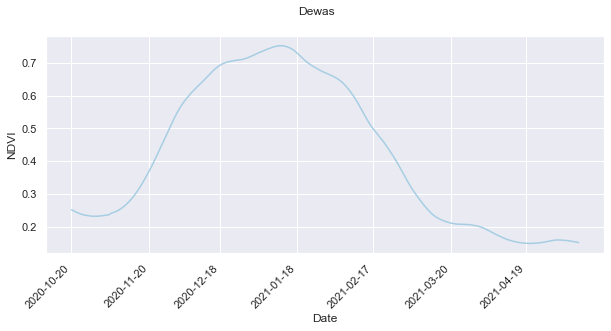

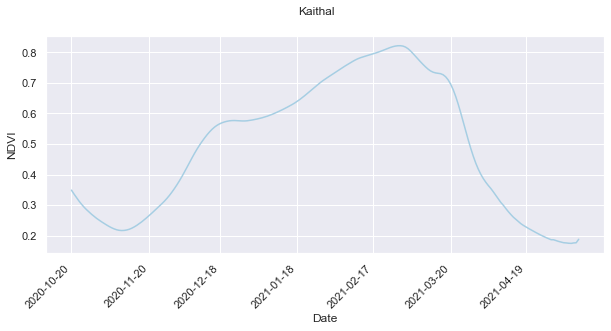

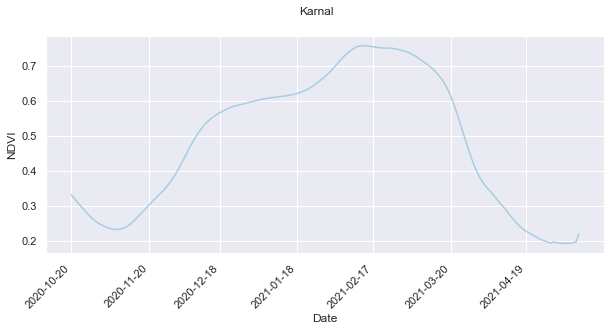

In [26]:
for district in districts:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(data[district]['merged'].groupby('date').agg({'ndvi': 'mean'}))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
    plt.xlabel('Date')
    plt.ylabel('NDVI')
    plt.suptitle(district)
    plt.show()